In [1]:
# Load the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, chi2, SelectKBest, RFE, RFECV, VarianceThreshold
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [4]:
# Import dataset
df = pd.read_table('Data/Charitable Donations/cup98LRN.txt', sep = ',', low_memory = False, na_values = ' ')

In [5]:
# Assign X as a DataFrame of features, and y_donate as a Series of the outcome variable (whether donate or not), 
# and y_amount as a series of the outcome variable (amount of donation)
X = df.drop(['TARGET_B', 'TARGET_D'], axis = 1)
y_donate = df['TARGET_B']
y_amount = df['TARGET_D']

# Basic Data Cleaning

In [6]:
# Shape of the data
X.shape, y_donate.shape, y_amount.shape

((95412, 479), (95412,), (95412,))

In [7]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
X.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 479 entries, ODATEDW to GEOCODE2
dtypes: float64(102), int64(309), object(68)
memory usage: 348.7+ MB


## 1. Categorical Variables

In [10]:
# Find all categorical variables and the values under them
for col in X.columns:
    if X[col].dtypes == 'object':
        print ('Values in {col}: {xyz}'.format(col = col, xyz = X[col].unique()))

Values in OSOURCE: ['GRI' 'BOA' 'AMH' 'BRY' nan 'CWR' 'DRK' 'NWN' 'LIS' 'MSD' 'AGR' 'CSM'
 'ENQ' 'HCC' 'USB' 'FRC' 'RKB' 'PCH' 'AMB' 'L15' 'BBK' 'L21' 'SYN' 'L01'
 'MOP' 'UCA' 'ESN' 'IMP' 'AVN' 'RMG' 'DNA' 'L04' 'AML' 'AIR' 'DUR' 'LHJ'
 'WKB' 'STL' 'DCD' 'IMA' 'ACS' 'ALZ' 'NEX' 'HAR' 'SGI' 'MBC' 'BSH' 'NAD'
 'HOS' 'HHL' 'GRT' 'L02' 'APP' 'DAC' 'BHG' 'NSH' 'NPT' 'L16' 'PV3' 'LOG'
 'ASC' 'AGS' 'ARG' 'DON' 'VIK' 'ARB' 'HHH' 'ANT' 'WRG' 'PBL' 'OMH' 'CRG'
 'UBA' 'ASH' 'COK' 'RPH' 'STV' 'NAS' 'SSS' 'LEO' 'KNG' 'KIP' 'ASS' 'GDA'
 'STR' 'CAW' 'GET' 'HAN' 'DEL' 'FLD' 'L25' 'MER' 'SYC' 'HAM' 'PSM' 'HIL'
 'SPN' 'DNB' 'GPS' 'ASP' 'INN' 'ABW' 'CFI' 'JFY' 'LAK' 'LVT' 'RED' 'TIM'
 'MON' 'MM3' 'FAR' 'MTR' 'HOW' 'FOR' 'LKE' 'DBL' 'K3M' 'PGR' 'ADD' 'IML'
 'SMZ' 'CNT' 'SUN' 'MCC' 'BEL' 'TVF' 'TRN' 'PCL' 'HRB' 'OVS' 'WFD' 'TX2'
 'NWF' 'KEN' 'NSN' 'NEW' 'CJR' 'NHB' 'FCR' 'BSM' 'SIG' 'CHT' 'CAP' 'TVG'
 'SUF' 'PRV' 'TRO' 'GUR' 'WIG' 'MAT' 'D02' 'GLP' 'HEA' 'BLI' 'EAS' 'SFH'
 'PBK' 'TOR' 'HJR' 'MCO' 'IWD' 'HE

Values in RFA_6: ['S4E' 'A2G' 'A1D' 'A1F' 'A1E' 'A3E' 'F1F' 'N2F' 'S3D' 'A1G' 'A2F' 'L1E'
 'I3G' 'S2D' 'F1G' 'S3E' 'S2E' 'A4E' 'A4D' 'N1F' 'N2G' 'S3G' 'A3F' 'S2G'
 'S4G' 'N1E' 'S4F' 'L2E' 'I2E' 'A2E' 'L2D' nan 'N4E' 'A4F' 'S4D' 'S3F'
 'I1E' 'I2F' 'L1F' 'A3G' 'N2E' 'N3E' 'N3F' 'N4G' 'L4F' 'S2F' 'N2D' 'A2D'
 'I1G' 'L2F' 'F1E' 'N1G' 'N1D' 'A4G' 'N4D' 'L1G' 'L2G' 'L1D' 'A3D' 'N3G'
 'F1D' 'A1C' 'I4E' 'I4F' 'L3E' 'L4E' 'N4F' 'L3F' 'I3F' 'A1A' 'I1F' 'L3D'
 'I2G' 'F1C' 'S4C' 'N3D' 'L4D' 'A2C' 'L3G' 'L1C' 'A4C' 'P1F' 'S2C' 'A3C'
 'U1E' 'U1F' 'L4G' 'I4G' 'I3E' 'N1C' 'S3B' 'U1G' 'S2B' 'U1D' 'S3C' 'A1B'
 'L3C' 'N2C' 'P1G' 'L4C' 'S4B' 'A3B' 'N3C' 'I4D' 'U1C' 'P1A' 'A2B' 'L2C'
 'I1D']
Values in RFA_7: ['S4E' 'A1E' 'S4F' 'I2D' 'A2F' 'S2E' 'A3E' 'S2F' 'A1F' 'P1F' 'F1F' nan
 'S3G' 'A3F' 'A1D' 'N2F' 'S2D' 'F1G' 'N3E' 'A2E' 'N2G' 'A3G' 'A1G' 'N1E'
 'A4F' 'L2E' 'N1F' 'S4D' 'L3D' 'N4E' 'P1G' 'N1G' 'A2G' 'L2F' 'A4D' 'S3E'
 'S3F' 'A2C' 'L1E' 'A3D' 'L1F' 'A4G' 'P1A' 'N2E' 'L3G' 'F1E' 'L2G' 'A4E'
 'S2G' 'S4G' 

#### Drop unimportant/duplicate categorical features
* 'OSOURCE' and 'ZIP' have a lot of categories, but using common sense, I think these features are not important, so I'm going to drop them
* Also, 'MDMAUD' (a matrix code describing the frequency and amount of giving for donors who have given a \$100\+ gift at any time in their giving history) can be dropped, because we also have MDMAUD_R, MDMAUD_F, MDMAUD_A, which split MDMAUD into its components
* Also, drop RFA_2R, RFA_2F, RFA_2A since they're already captured in the RFA_2 feature

In [11]:
X = X.drop(['OSOURCE', 'ZIP','MAILCODE', 'MDMAUD','NOEXCH','PVASTATE', 'AGEFLAG'], axis = 1)

#### Split some categorical features which are currently coded as matrix
* The RFA features (RFA_2 through RFA_24) are matrix code composed of Recency, Frequency, and Amount. Can drop these as well since the most important component is the amount, which is already captured in the RAMNT features.

In [12]:
#Find all RFA features
rfa_cols = list(X.columns[X.columns.get_loc('RFA_2'):X.columns.get_loc('RFA_24')+1])
# Drop the above RFA features                        
X = X.drop(rfa_cols, axis = 1)

In [13]:
# def rfa_split(df, rfa_cols):
#     for col in rfa_cols:
#         df['{col}R'.format(col = col)] = df[col].str[0]  #Get the Recency
#         df['{col}F'.format(col = col)] = df[col].str[1]  #Get the frequency 
#         df['{col}A'.format(col = col)] = df[col].str[2]  #Get the amount
#         df = df.drop(col, 1)  #Drop the original RFA variables after splitting them
#     return df

# X_new = rfa_split(X, rfa_cols)
# X_new.head()

In [14]:
# # Check examples of resulting split columns. Notice that RFA_ _F is of string type. Will need to convert it to numerical later.
# print (X_new.RFA_23R.unique())
# print (X_new.RFA_23F.unique())
# print (X_new.RFA_23A.unique())

In [15]:
X.RFA_2A.value_counts()

F    46964
E    21639
G    19397
D     7412
Name: RFA_2A, dtype: int64

In [16]:
# #amount_dict = {'L':0, 'C':1, 'M':2, 'T':'3', 'X':0}
# #frequency_dict = {'1':1,'2':2,'3':3,'4':4,'5':5,'X':0}
# amount_dict = {'A':0, 'B':1, 'C':2, 'D':3,'E':4,'F':5,'G':6,np.nan:0}
# X.RFA_2A = X.RFA_2A.map(amount_dict).astype(int)
# print(X.RFA_2A.unique())

* The DOMAIN feature is also a matrix code, which could be broken into 2 varaibles: Urbanicity level of the donor (1st byte), and Socio-economic status of the donor (2nd byte).

In [17]:
# Check current values in the DOMAIN feature
X.DOMAIN.unique()

array(['T2', 'S1', 'R2', 'S2', 'T1', 'R3', 'U1', 'C2', 'C1', 'U3', nan,
       'R1', 'U2', 'C3', 'U4', 'S3', 'T3'], dtype=object)

In [18]:
# Split DOMAIN into 2 variables: URBAN and SES
X['URBAN'] = X['DOMAIN'].str[0]
X['SES'] = X['DOMAIN'].str[1]
X = X.drop('DOMAIN', axis = 1)  #Drop the DOMAIN feature after spliting it
print (X.URBAN.unique())
print (X.SES.unique())   #Notice that SES is of string type. Will need to convert it to numerical later.


['T' 'S' 'R' 'U' 'C' nan]
['2' '1' '3' nan '4']


In [19]:
X.SES.dtype

dtype('O')

In [20]:
X.SES = X.SES.fillna(0)
X.SES = X.SES.astype(int)
X.SES.dtype

dtype('int32')

In [21]:
X.SES.value_counts()

2    46040
1    28498
3    16754
0     2316
4     1804
Name: SES, dtype: int64

#### Check all variables that have only 2 categories. Will need to recode NaN as 0, and the other value as 1.

In [22]:
# # # Find all categorical variables that have 2 levels
two_level_cat = []
for col in X.columns:
     if (len(X[col].unique()) == 2) & (X[col].dtype == 'object'):
        two_level_cat.append(col)

In [23]:
print (two_level_cat)

['RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'PEPSTRFL']


In [24]:
# Recode all the above variables as 0 and 1. Doing this will also turn them into integer type.
for col in two_level_cat:
    X[col] = [1 if x in ['Y', 'X', 'B', 'H'] else 0 for x in X[col]]

* The GENDER feature has strange values. Will group those values under 'Others'

In [25]:
X.GENDER.value_counts()

F    51277
M    39094
U     1715
J      365
A        2
C        2
Name: GENDER, dtype: int64

In [26]:
X.GENDER = [x if x in ['F', 'M'] else 'Others' for x in X.GENDER]

* NaN values in other categorical features will be imputed with the mode later.

### 2. Numerical Features

In [27]:
# First, create a list of columns which are numerical
num_cols = []
for col in X.columns:
    if X[col].dtype in ['int32', 'int64', 'float32', 'float64']:
        num_cols.append(col)
        
#print (num_cols)

In [28]:
X[num_cols].describe()

,ODATEDW,TCODE,DOB,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,SES
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,93096.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,74132.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,180.000000,6200.000000,95412.000000,51589.000000,15244.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,41380.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00

In [29]:
# Drop unimportant numeric features
X = X.drop(['TCODE','DOB','MSA', 'ADI', 'DMA', 'CONTROLN', 'ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_5', 
            'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14', 
            'ADATE_15', 'ADATE_16', 'ADATE_17','ADATE_18', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 
            'ADATE_24', 'RDATE_3','RDATE_4','RDATE_5','RDATE_6','RDATE_7','RDATE_8','RDATE_9','RDATE_10','RDATE_11',
            'RDATE_12','RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_17','RDATE_18','RDATE_19','RDATE_20','RDATE_21',
            'RDATE_22','RDATE_23','RDATE_24',], axis = 1)

In [30]:
# Check the remaining DATE features
date_cols = []
pattern_date = '.*DATE.*'

# Then, for column names which match the above pattern, convert them into string. (From these categorical variables I will 
# create dummy variables later.)
import re
for col in X.columns:
    if re.match(pattern_date, col):
        date_cols.append(col)
        #X_new[col] = X_new[col].astype(str)
        
print(date_cols)

['ODATEDW', 'MAXADATE', 'MINRDATE', 'MAXRDATE', 'LASTDATE', 'FISTDATE', 'NEXTDATE']


In [31]:
X[date_cols].describe()

,ODATEDW,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,85439.000000
mean,9141.363256,9701.631409,9252.650998,9441.860426,9548.100365,9135.651648,9151.022917
std,343.454752,5.752179,267.511838,172.870471,49.235664,320.394019,294.257260
min,8306.000000,9608.000000,7506.000000,7510.000000,9503.000000,0.000000,7211.000000
25%,8801.000000,9702.000000,9101.000000,9409.000000,9509.000000,8810.000000,8903.000000
50%,9201.000000,9702.000000,9309.000000,9506.000000,9512.000000,9201.000000,9204.000000
75%,9501.000000,9702.000000,9504.000000,9512.000000,9602.000000,9409.000000,9409.000000
max,9701.000000,9702.000000,9702.000000,9702.000000,9702.000000,9603.000000,9702.000000


In [32]:
for col in date_cols:
    X[col] = X[col].replace(0, None)

# covert date to the number of months different from July 1998

def month_cal(YYMM):  #Calculate number of months equivalent for the YYMM
    return int(str(YYMM)[0:2])*12 + int(str(YYMM)[2:4])

def month_diff(input_month, milestone = 9807):
    if input_month is None or np.isnan(input_month):
        return None
    else:
        return month_cal(milestone) - month_cal(input_month) 

for col in date_cols:
    X['SINCE_'+ col] = X[col].apply(month_diff)

X = X.drop(date_cols, axis = 1)

In [33]:
X.head()

,STATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGE,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,URBAN,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE
0,IL,0,0,0,0,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,NaN,NaN,0,5.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,12.0,10.0,4.0,7.741935,0,L,4,E,X,X,X,39.0,C,T,2,114,17,71,53,31,104,100.0
1,CA,0,0,0,0,14.0,46.0,H,NaN,NaN,NaN,M,1.0,6.0,M,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,3.0,0,15,55,11,6,2,1,NaN,NaN,0,9.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,

### Impute Missing Values

In [34]:
# See how many missing values there are in each column.
X.isnull().sum().sort_values(ascending = False).head()

RAMNT_5    95403
SOLP3      95232
RAMNT_3    95170
RAMNT_4    95131
RAMNT_6    94636
dtype: int64

In [35]:
# There are lots of missing values in almost all columns. Will impute them with the mode (for both numerical and categorical 
# variables) in order to preserve the values with the highest frequency.
from sklearn.base import TransformerMixin

class Missing_Imputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
# Imputation of missing values. freq for nominal, median for numeric

missing_recode = Missing_Imputer()
missing_recode.fit(X)
X_impute = missing_recode.transform(X)
    
# X_impute = DataFrameImputer().fit_transform(X_new)
X_impute.head()

,STATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGE,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,URBAN,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE
0,IL,0,0,0,0,36.0,60.0,H,M,M,M,M,1.0,4.0,F,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,39,34,18,10,2,1,1.0,12.0,0,5.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,10.0,10.0,12.0,12.0,15.0,15.0,14.0,10.0,12.0,13.0,10.0,10.0,11.0,11.0,11.0,10.0,10.0,12.0,10.0,10.0,11.0,9.0,240.0,31,14,5.0,12.0,10.0,4.0,7.741935,0,L,4,E,X,X,X,39.0,C,T,2,114,17,71,53,31,104,100.0
1,CA,0,0,0,0,14.0,46.0,H,M,M,M,M,1.0,6.0,M,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,3.0,0,15,55,11,6,2,1,1.0,12.0,0,9.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5

In [36]:
# Check that there are no more missing values
X_impute.isnull().sum().sort_values(ascending = False).head(5)

SINCE_NEXTDATE    0
HHP2              0
DW2               0
DW3               0
DW4               0
dtype: int64

Now all of the categorical and numerical features have the correct data type and mising values have been imputed. Unimportant features have also been dropped.

### Create dummy variables from categorical features

In [37]:
# Create a list of features to turn into dummies
to_dummy = []
for col in X_impute.columns:
    if X_impute[col].dtype == 'object':
        to_dummy.append(col)
print (to_dummy)

['STATE', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER', 'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2', 'URBAN']


In [38]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, to_dummy):
    for x in to_dummy:
        dummies = pd.get_dummies(df[x], prefix = x)
        df = df.drop(x, 1)    #Drop the original variable after dummying
        df = pd.concat([df, dummies], axis=1)
    return df

X_dummy = dummy_df(X_impute, to_dummy)
X_dummy.head()

,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,HPHONE_D,RFA_2F,CLUSTER2,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,HOMEOWNR_H,HOMEOWNR_U,CHILD03_B,CHILD03_F,CHILD03_M,CHILD07_B,CHILD07_F,CHILD07_M,CHILD12_B,CHILD12_F,CHILD12_M,CHILD18_B,CHILD18_F,CHILD18_M,GENDER_F,GENDER_M,GENDER_Others,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_C,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,URBAN_C,URBAN_R,URBAN_S,URBAN_T,URBAN_U
0,0,0,0,0,36.0,60.0,1.0,4.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,39,34,18,10,2,1,1.0,12.0,0,5.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0

In [39]:
#Check the shape of the new data frame
print (X.shape)
print (X_dummy.shape)

(95412, 399)
(95412, 487)


In [40]:
np.mean(df.TARGET_B)

0.05075881440489666

# Feature selection

### Variance Threshold 

In [41]:
# Standardize the data to prepare for variance threshold feature selection

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_dummy)
X_scaled = pd.DataFrame(minmax_scaler.transform(X_dummy), columns = X_dummy.columns)
X_scaled.describe()

,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,HPHONE_D,RFA_2F,CLUSTER2,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,HOMEOWNR_H,HOMEOWNR_U,CHILD03_B,CHILD03_F,CHILD03_M,CHILD07_B,CHILD07_F,CHILD07_M,CHILD12_B,CHILD12_F,CHILD12_M,CHILD18_B,CHILD18_F,CHILD18_M,GENDER_F,GENDER_M,GENDER_Others,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_C,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,URBAN_C,URBAN_R,URBAN_S,URBAN_T,URBAN_U
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000

In [42]:
# Split data into train and test sets
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_donate, train_size=0.70, random_state=123)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_donate, train_size=0.70, random_state=123)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(66788, 487) (28624, 487) (66788,) (28624,)
(66788, 487) (28624, 487) (66788,) (28624,)


### RFE

In [ ]:
# ### variable reduction

# # specify the model
# estimator =LogisticRegression(class_weight='balanced')    # estimator for RFE, select the suitable model 

# # select variables using RFECV
# selector = RFECV(estimator, step=3, cv=3, n_jobs=-1, scoring='roc_auc')
# selector = selector.fit(X_train, y_train)


In [ ]:
# print("\nOptimal number of features : %d\n" % selector.n_features_)

In [ ]:
# ### show the selected variables of RFECV
# selection = list(zip(selector.ranking_, selector.support_,X_train.columns))
# selection.sort()
# for i in selection[:20]:
#     print(i)

# ### variable list from RFECV 
# selected_val0 = X_train.columns[selector.support_]
# print(selected_val0)

### Feature Selection Using Variance THreshold

In [43]:
# Remove all features whose variance are less than 0.05
var_selector = VarianceThreshold(threshold = 0.05)
var_selector.fit(X_train_scaled)
indices_selected = var_selector.get_support(indices=True)
colnames_vtselected = [X_train_scaled.columns[i] for i in indices_selected]
print(colnames_vtselected)
len(colnames_vtselected)

['RECINHSE', 'CLUSTER', 'INCOME', 'WEALTH1', 'DATASRCE', 'WEALTH2', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'CRAFTS', 'FISHER', 'GARDENIN', 'WALKER', 'LIFESRC', 'PEPSTRFL', 'POP90C1', 'POP90C2', 'POP90C3', 'DW1', 'DW2', 'DW4', 'DW5', 'HVP1', 'HVP2', 'HVP3', 'HVP4', 'HVP5', 'RP1', 'RP2', 'RP3', 'RP4', 'LFC8', 'LFC9', 'HC2', 'HC5', 'HC6', 'HC7', 'HC8', 'HC11', 'HC13', 'HC17', 'HC18', 'HC19', 'HPHONE_D', 'RFA_2F', 'CLUSTER2', 'SINCE_ODATEDW', 'STATE_CA', 'STATE_FL', 'STATE_IL', 'STATE_MI', 'STATE_TX', 'HOMEOWNR_H', 'HOMEOWNR_U', 'GENDER_F', 'GENDER_M', 'RFA_2A_D', 'RFA_2A_E', 'RFA_2A_F', 'RFA_2A_G', 'GEOCODE2_A', 'GEOCODE2_B', 'GEOCODE2_C', 'GEOCODE2_D', 'URBAN_C', 'URBAN_R', 'URBAN_S', 'URBAN_T', 'URBAN_U']


74

### Further Feature Selection using RFECV

In [83]:
# Specify the model
estimator = LogisticRegression()    # estimator for RFE, select the suitable model 

# Select variables using RFECV
rfe_selector = RFECV(estimator, step=1, cv=2, n_jobs=-1, scoring='roc_auc')
rfe_selector.fit(X_train[colnames_vtselected], y_train)


RFECV(cv=2,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=-1, scoring='roc_auc', step=1, verbose=0)

In [84]:
# Show the variables selected by RFECV
rfe_selected = list(zip(rfe_selector.ranking_, rfe_selector.support_, colnames_vtselected))
rfe_selected = pd.DataFrame(rfe_selected, columns = ['Ranking', 'Support', 'Feature'])

In [85]:
rfe_selected_var = list(rfe_selected[rfe_selected.Ranking == 1]['Feature'])
print(rfe_selected_var)

['RECINHSE', 'INCOME', 'WEALTH2', 'COLLECT1', 'BIBLE', 'CATLG', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'CRAFTS', 'FISHER', 'GARDENIN', 'WALKER', 'LIFESRC', 'PEPSTRFL', 'HPHONE_D', 'RFA_2F', 'STATE_CA', 'STATE_FL', 'STATE_IL', 'STATE_MI', 'STATE_TX', 'HOMEOWNR_H', 'HOMEOWNR_U', 'GENDER_F', 'GENDER_M', 'RFA_2A_D', 'RFA_2A_E', 'RFA_2A_F', 'RFA_2A_G', 'GEOCODE2_A', 'GEOCODE2_B', 'GEOCODE2_C', 'GEOCODE2_D', 'URBAN_C', 'URBAN_R', 'URBAN_S', 'URBAN_T', 'URBAN_U']


In [86]:
len(rfe_selected_var)

40

### Define Some Functions for modeling

In [55]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best = gs.best_estimator_
    return best


In [56]:
def do_classify(clf, parameters, Xtrain, ytrain, Xtest, ytest, score_func=None, n_folds=5, n_jobs=1):
   
      
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
   # print (############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print (classification_report(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf

In [102]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if mesh:
        if zfunc:
            p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
            p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z=zfunc(p0, p1)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=alpha, axes=ax)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    ax.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

## Logistic Regression

In [89]:
clflog = LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
clflog = do_classify(clflog, parameters, X_train[rfe_selected_var], y_train, X_test[rfe_selected_var], y_test, 
                                            n_jobs = 4, score_func = 'f1')

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 0.0001} 0.0 [mean: 0.00000, std: 0.00000, params: {'C': 0.0001}, mean: 0.00000, std: 0.00000, params: {'C': 0.001}, mean: 0.00000, std: 0.00000, params: {'C': 0.1}, mean: 0.00000, std: 0.00000, params: {'C': 1}, mean: 0.00000, std: 0.00000, params: {'C': 10}, mean: 0.00000, std: 0.00000, params: {'C': 100}]
Accuracy on training data: 0.95
Accuracy on test data:     0.95
[[27155     0]
 [ 1469     0]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97     27155
          1       0.00      0.00      0.00      1469

avg / total       0.90      0.95      0.92     28624

########################################################


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
X_train[rfe_selected_var].shape

(66788, 40)

In [107]:
plt.figure()
ax=plt.gca()

points_plot(ax, X_train[rfe_selected_var], X_test[rfe_selected_var], y_train, y_test, clflog)

ValueError: X has 2 features per sample; expecting 40

In [52]:
# # Logistic regression
# logreg = LogisticRegression()
# logreg.fit(X_train[rfe_selected_var], y_train)
# y_pred_prob = logreg.predict_proba(X_test[rfe_selected_var])[:,1]
# roc_auc_score(y_test, y_pred_prob)

0.52934565316548132

In [53]:
# y_pred = logreg.predict(X_test[rfe_selected_var])
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

[[27155     0]
 [ 1469     0]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97     27155
          1       0.00      0.00      0.00      1469

avg / total       0.90      0.95      0.92     28624



C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
y_test.mean(), y_pred.mean()

(0.051320570150922305, 0.0)

 ## Tree based methods

### Decision Tree

In [90]:

clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1 = do_classify(clfTree1, parameters,
                                        X_train[rfe_selected_var], y_train, X_test[rfe_selected_var], y_test, 
                                            n_jobs = 4, score_func = 'recall')

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'max_depth': 7, 'min_samples_leaf': 2} 0.00148152584518 [mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 2}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 3}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 4}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 5}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 6}, m

### Random Forest

In [91]:


clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest = do_classify(clfForest, parameters, X_train[rfe_selected_var], y_train, X_test[rfe_selected_var], y_test,
                                                             n_jobs = 4, score_func='recall')


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'n_estimators': 1} 0.0607575769633 [mean: 0.06076, std: 0.00694, params: {'n_estimators': 1}, mean: 0.01393, std: 0.00483, params: {'n_estimators': 2}, mean: 0.02845, std: 0.00239, params: {'n_estimators': 3}, mean: 0.01363, std: 0.00379, params: {'n_estimators': 4}, mean: 0.02015, std: 0.00346, params: {'n_estimators': 5}, mean: 0.01186, std: 0.00386, params: {'n_estimators': 6}, mean: 0.01156, std: 0.00343, params: {'n_estimators': 7}, mean: 0.01067, std: 0.00330, params: {'n_estimators': 8}, mean: 0.01097, std: 0.00415, params: {'n_estimators': 9}, mean: 0.00771, std: 0.00255, params: {'n_estimators': 10}, mean: 0.01067, std: 0.00256, params: {'n_estimators': 11}, mean: 0.01037, std: 0.00210, params: {'n_estimators': 12}, mean: 0.00919, std: 0.00237, params: {'n_estimators': 13}, mean: 0.00919, std: 0.00368, params: {'n_estimators': 14}, mean: 0.01126, std: 0.00241, params: {'n_estimators': 15}, mean: 0.01067, std: 0.00330, params: {'n_estimators': 16}, mean: 0.01008, std: 0.0

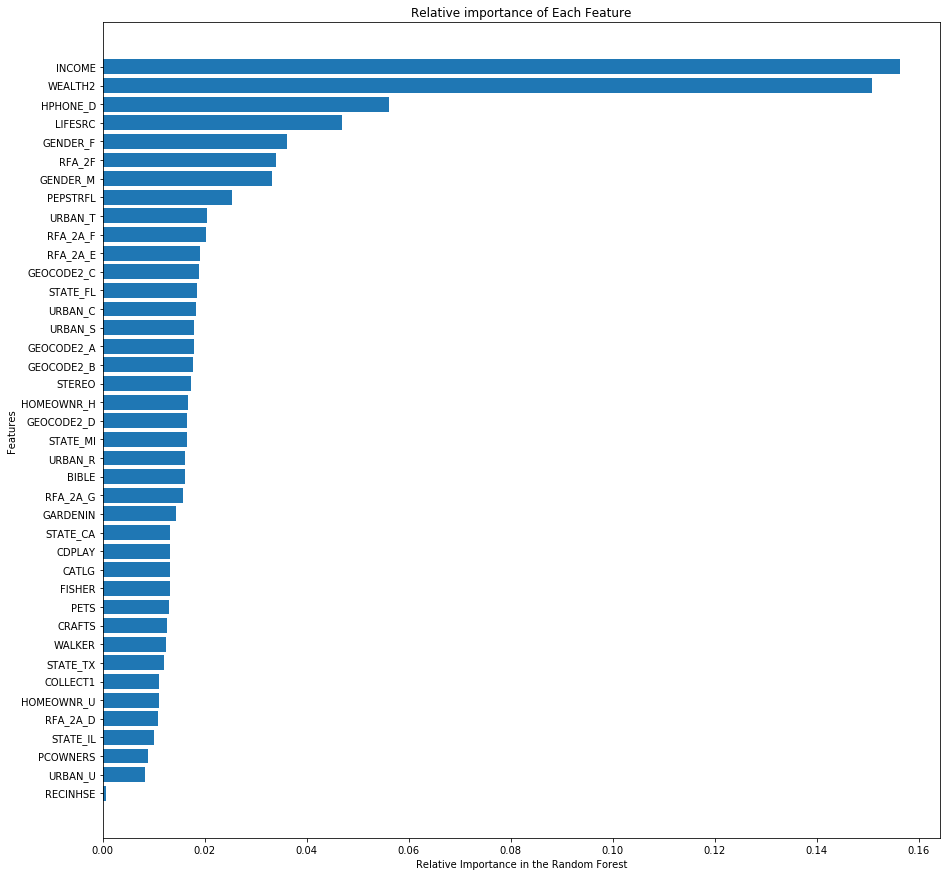

In [92]:
importance_list = clfForest.feature_importances_
name_list = rfe_selected_var
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))

plt.figure(figsize = (15, 15))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')

plt.show()

### Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB = do_classify(clfGB, parameters,X_train[rfe_selected_var], y_train, X_test[rfe_selected_var], y_test,   
                                                       n_jobs = 4, score_func='recall')


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'max_depth': 5, 'n_estimators': 46} 0.000592610338074 [mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 30}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 31}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 32}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 33}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 34}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 35}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 36}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 37}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 38}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 39}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 40}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'n_estimators': 41}, mean: 0.00000, std: 0.00000, params: {'

Accuracy on training data: 0.95
Accuracy on test data:     0.95
[[27153     2]
 [ 1468     1]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97     27155
          1       0.33      0.00      0.00      1469

avg / total       0.92      0.95      0.92     28624

########################################################


### Feature Reduction Using PCA

In [93]:
# Perform PCA on the features previously selected by Variance Threshold

pca = PCA()
pca.fit(X_scaled[colnames_vtselected])
pca_table = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_, 'PCA #': 
                          np.arange(1, len(pca.explained_variance_ratio_) + 1)})
pca_table.head()

,PCA #,Variance Explained
0,1,0.162683
1,2,0.068165
2,3,0.055516
3,4,0.052623
4,5,0.050238


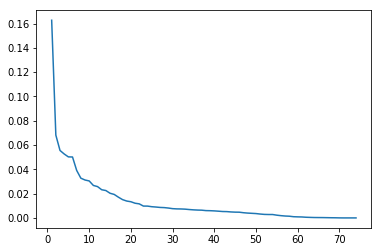

In [94]:
# Scree plot
plt.plot(pca_table['PCA #'], pca_table['Variance Explained'])
#plt.xlim(0,50)
plt.show()

In [95]:
pca_table['Variance Explained'].head(20).sum()

0.7699415950704214

In [96]:
# With 20 principal components, we can expalin 77% of the variation in the data.
# Apply PCA with 10 components:
pca20 = PCA(n_components=20)
#pca10.fit(X_dummy[colnames_vtselected])

pca_columns = []
for i in range(1,21):
    col = 'pca'+str(i)
    pca_columns.append(col)

X_pca = pca20.fit_transform(X_scaled[colnames_vtselected])
X_pca = pd.DataFrame(X_pca, columns = pca_columns)
X_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20
0,1.199758,-0.400270,-0.569740,0.590096,0.663712,-0.660025,-0.814580,-0.344540,0.724341,0.215034,0.281266,0.296919,1.011982,-0.088075,0.790347,0.083755,0.391215,0.078036,-0.050049,-0.340074
1,-2.107190,1.092930,-0.318353,-0.916728,0.165828,-0.641741,-0.446731,-0.298892,-0.595791,0.738332,0.403246,-0.380309,-0.070242,-0.518347,-0.321293,0.083163,0.122559,0.225067,-0.156410,0.074689
2,2.120869,0.268286,-0.275212,-0.382535,-0.135944,-1.437792,0.744112,-0.059874,0.036222,-0.417049,-0.583377,0.051237,-0.208749,-0.390429,0.649262,0.154267,0.750977,0.163258,0.079165,-0.200858
3,1.475809,-0.165057,-1.302841,0.062163,0.732005,-0.941543,0.711365,-0.394927,0.150438,-0.228032,-0.559351,0.757446,-0.407375,-0.479134,0.469399,0.224217,1.012872,0.157652,-0.194776,0.116380
4,-0.299743,-0.080496,0.786102,0.740687,0.752870,1.079228,0.325806,-0.125810,-0.260670,-0.474874,-0.622111,-0.916651,-0.151292,0.167427,0.526697,-0.348404,0.092118,-0.066111,0.704359,0.991255


In [97]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y_donate, train_size=0.70, random_state=123)
print (X_pca_train.shape, X_pca_test.shape, y_train.shape, y_test.shape)

(66788, 20) (28624, 20) (66788,) (28624,)


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Random Forest using pca dataset

In [98]:
clfForest_pca = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest_pca = do_classify(clfForest_pca, parameters, X_pca_train, y_train, X_pca_test, y_test,
                                                             n_jobs = 4, score_func='recall')


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'n_estimators': 1} 0.0583899019577 [mean: 0.05839, std: 0.00720, params: {'n_estimators': 1}, mean: 0.01008, std: 0.00343, params: {'n_estimators': 2}, mean: 0.01867, std: 0.00597, params: {'n_estimators': 3}, mean: 0.00326, std: 0.00218, params: {'n_estimators': 4}, mean: 0.00563, std: 0.00287, params: {'n_estimators': 5}, mean: 0.00119, std: 0.00111, params: {'n_estimators': 6}, mean: 0.00237, std: 0.00118, params: {'n_estimators': 7}, mean: 0.00059, std: 0.00073, params: {'n_estimators': 8}, mean: 0.00148, std: 0.00094, params: {'n_estimators': 9}, mean: 0.00089, std: 0.00119, params: {'n_estimators': 10}, mean: 0.00119, std: 0.00059, params: {'n_estimators': 11}, mean: 0.00059, std: 0.00073, params: {'n_estimators': 12}, mean: 0.00059, std: 0.00073, params: {'n_estimators': 13}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 14}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 15}, mean: 0.00030, std: 0.00059, params: {'n_estimators': 16}, mean: 0.00030, std: 0.0

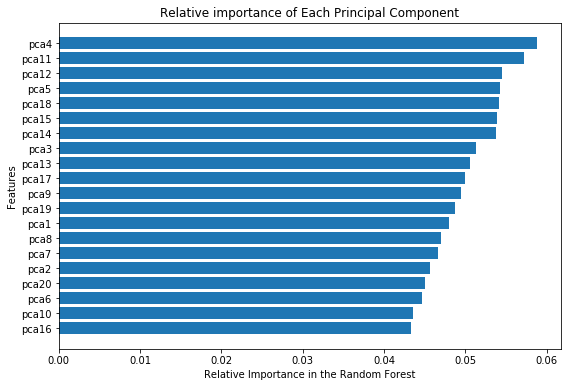

In [99]:
importance_list = clfForest_pca.feature_importances_
name_list = pca_columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))

plt.figure(figsize = (9, 6))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Principal Component')

plt.show()

In [104]:
plt.figure()
ax=plt.gca()

points_plot(ax, X_pca_train, X_pca_test, y_train, y_test, clfForest_pca);

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 2 

### Naive Bayes Using pca dataset

In [100]:

clfnb_pca=GaussianNB()
clfnb_pca.fit( X_pca_train, y_train)
print (confusion_matrix(y_test, clfnb_pca.predict(X_pca_test)))

          

[[27155     0]
 [ 1469     0]]


## SelectPercentile

In [101]:
# Train a logistic regression classifier on the selected columns from SelectPercentile Feature Selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectPercentile, chi2
# from sklearn.model_selection import train_test_split, KFold, cross_val_score
# from sklearn.metrics import accuracy_score, roc_auc_score

ps = [1, 2, 5, 10, 15, 20]#List of percentiles to iterate. Goal is to check which percentile gives the highest auc 
                                # score on the test set
max_auc = 0

for p in ps:
    percent_selector = SelectPercentile(score_func= chi2, percentile=p)
    percent_selected = percent_selector.fit(X_dummy, y_donate)
    indices_selected = percent_selected.get_support(indices = True)
    cols_selected = [X_dummy.columns[i] for i in indices_selected] #columns which are selected by SelectPercentile
    X_train_selected = X_train[cols_selected].values
    X_test_selected = X_test[cols_selected].values
    clf = LogisticRegression()
    #clf.fit(X_train_selected, y_train)
    cv_scores = cross_val_score(clf, X_train_selected, y_train, scoring = 'roc_auc', cv = 5) #auc for each CV
    auc = np.mean(cv_scores)   #Mean auc score on the training set
    
    if auc > max_auc:
            max_auc = auc
            best_percentile = p
            X_train_best = X_train_selected
            X_test_best = X_test_selected
            cols_best = cols_selected
print ('Best Percentile is: {}'.format(p))
print ('Best AUC on training set is: {}'.format(max_auc))

Best Percentile is: 20
Best AUC on training set is: 0.5983775323666809


In [102]:
print(cols_best)

['RECP3', 'HIT', 'PEPSTRFL', 'POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C3', 'ETH1', 'ETH2', 'HHAGE3', 'HV1', 'HV2', 'HU5', 'HHD7', 'HHD9', 'ETHC3', 'ETHC4', 'ETHC5', 'ETHC6', 'HVP1', 'HVP2', 'HVP3', 'HVP4', 'HVP5', 'HVP6', 'HUR2', 'RP1', 'RP2', 'RP3', 'RP4', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'HHAS2', 'HHAS3', 'HHAS4', 'MC3', 'TPE3', 'TPE4', 'LFC10', 'OCC1', 'OCC2', 'OCC11', 'EC2', 'EC3', 'EC7', 'EC8', 'VC3', 'VC4', 'POBC2', 'VOC2', 'HC2', 'HC3', 'HC4', 'HC5', 'HC6', 'HC7', 'HC8', 'HC9', 'HC12', 'HC18', 'CARDPROM', 'NUMPROM', 'RAMNT_8', 'RAMNT_12', 'RAMNT_16', 'RAMNTALL', 'NGIFTALL', 'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'AVGGIFT', 'RFA_2F', 'CLUSTER2', 'SINCE_ODATEDW', 'SINCE_MAXRDATE', 'SINCE_LASTDATE', 'SINCE_FISTDATE', 'SINCE_NEXTDATE', 'RFA_2A_D', 'RFA_2A_E', 'RFA_2A_G']


In [103]:
# variable standardization for variable selection
from sklearn.preprocessing import scale
X_scaled = scale(X_dummy[cols_best])
X_scaled = pd.DataFrame(data = X_scaled, columns = cols_best)


In [104]:
# PCA on the above features

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)    
#pca1 = PCA(n_components=90)
#pca1.fit(X_kbest)
    
#pca_num = np.arange(1, len(pca1.explained_variance_ratio_) + 1)
pca_table = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_*100, 'PCA #': 
                           np.arange(1, len(pca.explained_variance_ratio_) + 1)})
pca_table.head()

,PCA #,Variance Explained
0,1,25.140607
1,2,8.262817
2,3,7.437231
3,4,5.605366
4,5,4.500259


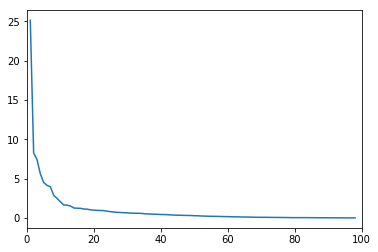

In [105]:
# Scree plot
plt.plot(pca_table['PCA #'], pca_table['Variance Explained'])
plt.xlim(0, 100)
plt.show()

In [106]:
pca_table['Variance Explained'].head(15).sum()

73.72141554377086

In [109]:
pca15 = PCA(n_components=15)
for i in range(16):
    X_scaled['pca{i}'.format(i=i)] = pca.fit_transform(X_scaled)[:,i-1]
X_scaled.head()

,RECP3,HIT,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C3,ETH1,ETH2,HHAGE3,HV1,HV2,HU5,HHD7,HHD9,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC10,IC11,IC12,IC13,IC14,IC15,IC19,IC20,IC21,IC22,IC23,HHAS2,HHAS3,HHAS4,MC3,TPE3,TPE4,LFC10,OCC1,OCC2,OCC11,EC2,EC3,EC7,EC8,VC3,VC4,POBC2,VOC2,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC12,HC18,CARDPROM,NUMPROM,RAMNT_8,RAMNT_12,RAMNT_16,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,AVGGIFT,RFA_2F,CLUSTER2,SINCE_ODATEDW,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE,RFA_2A_D,RFA_2A_E,RFA_2A_G,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,-0.146957,-0.356881,1.052458,-0.394185,-0.412177,-0.419471,-1.235273,0.970573,0.340039,-0.387486,0.053343,-0.618881,-0.525693,-0.321105,-0.353743,-0.266461,0.621326,-0.431790,-0.453938,-0.286393,-0.435249,-0.440457,-0.603234,-0.657898,-0.909136,-0.356846,0.711411,-0.843023,-1.069730,-1.297573,-0.145106,-0.202946,-0.397590,-0.238224,-0.307575,-0.331606,-0.585640,-0.098231,-0.785950,-0.661002,-0.486551,-0.191477,-0.874767,-0.156510,-0.687716,-0.666113,-0.483565,-0.050958,-0.338264,0.471262,-0.977280,-0.904544,-0.429073,-0.400311,-0.717487,-0.622342,-1.344233,2.160262,0.873309,-0.374350,-1.034951,-0.618675,-0.901694,0.437362,0.779032,0.884117,0.568494,0.402294,0.093516,-0.363463,-0.468939,-0.265051,0.315814,-0.356914,-0.569963,1.866657,0.997799,1.176593,-0.026265,-0.088038,-0.267169,1.142781,2.501429,1.975369,-0.333970,-0.319128,-0.523992,-0.520509,1.948226,0.398135,0.699936,0.446513,-0.091389,0.602828,0.640434,-0.290219,1.846418,-0.505147,-0.049232,-2.759821,-4.805829,0.731578,0.343223,0.187981,-2.105586,0.899022,0.397734,-1.017044,-0.063828,0.229946,1.277443,-0.337262,1.958062,0.372866
1,-0.146957,1.362283,-0.950157,0.061833,0.051442,-0.105777,0.851990,-0.652899,-0.849658,-0.447400,-1.335135,4.678641,4.311861,-0.225783,-0.731288,-0.693530,-1.004793,-0.431790,-0.453938,-0.286393,3.133105,2.412435,1.716348,1.274344,0.847858,4.846644,1.737588,1.921384,1.392290,0.952098,0.719955,4.591923,4.083623,3.959708,3.531802,2.388278,-1.343710,-0.098231,1.441874,3.223919,4.713306,6.704012,-1.036827,-0.344406,1.112426,2.917040,3.823598,5.372753,-0.660037,1.350808,-0.776625,-0.319469,-0.429073,-0.400311,-0.717487,0.956971,1.597521,-0.903753,-0.455415,-1.032037,1.637263,1.790251,-1.312204,-1.056020,-0.827938,1.681895,-1.107185,-0.098445,0.799205,1.392240,1.591138,1.152412,-1.156594,-0.356914,-0.569963,-0.567439,-0.749689,-0.651858,-0.026265,-0.088038,-0.097531,-0.484816,-0.771780,-0.896527,0.235235,0.199469,0.550771,0.215310,0.083847,-1.628365,-0.755856,-0.629339,-0.091389,-0.647626,-1.186922,-0.290219,-0.541589,1.979622,0.008950,14.985452,3.484381,1.360586,2.639664,7.026053,-1.191454,-1.688410,-0.335688,-1.723292,3.836588,1.451850,-0.645466,-2.566092,2.098872,1.865571
2,-0.146957,-0.141985,1.052458,0.652098,0.805850,0.681285,-1.235273,1.794798,0.530390,-0.327572,0.053343,-0.599768,-0.619637,0.203165,-0.164971,-0.266461,0.052184,-0.431790,-0.354663,-0.286393,-0.510372,-0.628560,-0.794259,-0.902830,-0.807771,-0.356846,-0.454699,-0.905144,-1.155615,-1.540781,-1.339716,-0.546753,-0.547348,-0.591668,-0.528966,-0.484228,0.723755,-0.407958,-0.614579,-0.661002,-0.486551,-0.191477,0.421717,-0.250458,-0.687716,-0.666113,-0.483565,-0.231748,0.305282,-0.701465,0.025995,-0.416982,-0.429073,-0.400311,-0.285030,-0.500856,-1.064066,2.330485,1.598068,0.941023,-0.932173,-0.618675,-0.080672,-0.309329,1.238166,0.245894,-0.149654,0.068468,-0.024099,0.012759,0.124114,0.207437,-0.164319,-0.356914,-0.072791,2.316028,0.881300,0.697713,-0.026265,-0.439504,-0.606446,0.822321,2.033828,1.975369,-0.675493,-0.159560,-0.882247,-0.544692,1.948226,1.518043,0.408778,1.375659,-0.091389,0.549617,0.340867,-0.290219,1.846418,-0.505147,-0.046998,-4.715442,-4.476509,0.191879,0.147763,2.089647,-0.899596,-0.874635,1.644448,-0.868065,-0.321582,0.544229,1.030752,0.171567,0.757825,0.378243
3,-0.146957,-0.141985,

In [115]:
X_pca = X_scaled.iloc[:,-15:]
X_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,-2.759821,-4.805829,0.731578,0.343223,0.187981,-2.105586,0.899022,0.397734,-1.017044,-0.063828,0.229946,1.277443,-0.337262,1.958062,0.372866
1,14.985452,3.484381,1.360586,2.639664,7.026053,-1.191454,-1.688410,-0.335688,-1.723292,3.836588,1.451850,-0.645466,-2.566092,2.098872,1.865571
2,-4.715442,-4.476509,0.191879,0.147763,2.089647,-0.899596,-0.874635,1.644448,-0.868065,-0.321582,0.544229,1.030752,0.171567,0.757825,0.378243
3,-2.720002,-2.741986,2.018249,0.602213,2.153785,-1.539646,-0.932715,-0.119974,-2.164816,-0.993872,-0.383110,0.474578,1.132631,-1.302899,-0.183347
4,-5.306530,1.155093,9.056271,-5.589646,2.378150,-1.302551,2.432874,-2.029057,4.782624,-1.475247,-1.237003,0.804535,-3.298147,0.774231,-0.472835


In [116]:
#X_pca = pca.fit_transform(X_scaled[cols_selected])[:,:20]
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y_donate, train_size=0.70, random_state=123)
X_pca_train.shape, X_pca_test.shape, y_train.shape, y_test.shape

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((66788, 15), (28624, 15), (66788,), (28624,))

In [117]:
y_train.mean(), y_test.mean()

(0.050518057136012456, 0.051320570150922305)

In [120]:
# Use the data that has been reduced by pca
# Hyperparameter tuning: C
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}

clf = LogisticRegression()
fitmodel = GridSearchCV(clf, param_grid=parameters, cv=5, scoring='roc_auc')
fitmodel.fit(X_pca_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_


(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 0.001},
 0.6126586957631215,
 [mean: 0.61227, std: 0.00986, params: {'C': 0.0001},
  mean: 0.61266, std: 0.01047, params: {'C': 0.001},
  mean: 0.61243, std: 0.01074, params: {'C': 0.1},
  mean: 0.61243, std: 0.01074, params: {'C': 1},
  mean: 0.61243, std: 0.01075, params: {'C': 10},
  mean: 0.61243, std: 0.01075, params: {'C': 100}])

In [121]:
print ('Best C is: {}'.format(fitmodel.best_params_))
print ('Best AUC on training set is: {}'.format(fitmodel.best_score_))

Best C is: {'C': 0.001}
Best AUC on training set is: 0.6126586957631215


In [126]:
# Model evaluation on the test set 
#clf = LogisticRegression(C=fitmodel.best_params_['C'])
clf.fit(X_pca_train, y_train)
y_pred_prob = clf.predict_proba(X_pca_test)[:,1]  #Compute predicted probabilities using X_test
auc_test = roc_auc_score(y_test, y_pred_prob)    #auc score on the test set
print ('AUC on the test set is: {}'.format(auc_test))

AUC on the test set is: 0.6257752089804401


In [128]:
#clf2 = LogisticRegression(class_weight='balanced')
#clf2.fit(X_pca_train, y_train)
y_pred = clf.predict(X_pca_test)
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[27155     0]
 [ 1469     0]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97     27155
          1       0.00      0.00      0.00      1469

avg / total       0.90      0.95      0.92     28624



C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
X_pca_train

array([[ 4.50586746,  0.65649265,  4.97813861, ...,  0.32532805,
         0.08641408,  0.3667223 ],
       [ 1.60866272,  4.13546477,  1.61836298, ..., -3.06386036,
         0.20884632, -0.77059075],
       [ 3.48463628, -2.68980524, -1.62128997, ...,  0.04947293,
         0.14149415, -0.80888336],
       ..., 
       [ 8.15059635,  0.66570822, -0.03960093, ...,  1.19533858,
        -0.30470747, -0.85529734],
       [-0.38581782, -4.51979568,  0.43589073, ...,  1.07072083,
        -0.64135382, -0.55846731],
       [ 2.04536718,  3.35475683, -1.82686203, ..., -2.35646697,
         0.26231203, -1.01869545]])

### PCA (not good because need a lot of components to explain a reasonable amount of variance)

In [98]:
# Scale the dataset first
from sklearn.preprocessing import scale
X_scaled = scale(X_dummy)
X_scaled = pd.DataFrame(data = X_scaled, columns = X_dummy.columns)

In [99]:
# Perform PCA on X_scaled
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)    
pca_table = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_, 'PCA #': 
                          np.arange(1, len(pca.explained_variance_ratio_) + 1)})
# Check that the total variance in above table sums to 1
pca_table['Variance Explained'].sum()

1.0000000000000018

In [100]:
# View first few principal components
pca_table.head()

,PCA #,Variance Explained
0,1,0.024182
1,2,0.020304
2,3,0.015393
3,4,0.013149
4,5,0.012351


In [142]:
pca_table['Variance Explained'].head(400).sum()

0.5485822827854276

The first 200 components only explain 41% of the variance in the datase --> using PCA in this case is probably not a good one.

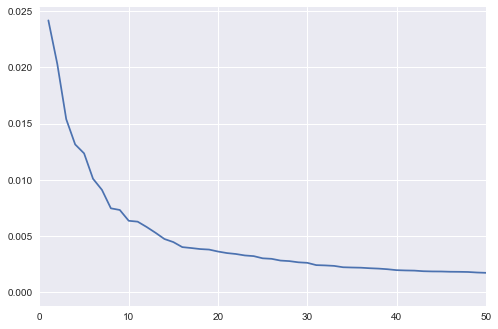

In [101]:
# Scree plot
plt.plot(pca_table['PCA #'], pca_table['Variance Explained'])
plt.xlim(0, 50)
plt.show()

## SelectKBest

In [164]:
# from sklearn.feature_selection import SelectKBest

ks = [10, 20, 30, 40, 50]#List of k's to iterate. Goal is to check which k gives the highest auc 
                                # score on the training set
max_auc_k = 0

for k in ks:
    k_selector = SelectKBest(k = k)
    k_selected = k_selector.fit(X_scaled, y_donate)
    kindices_selected = k_selected.get_support(indices = True)
    kcols_selected = [X_dummy.columns[i] for i in kindices_selected]  #columns which are selected by kbest
    X_train_selected_k = X_train[kcols_selected].values
    X_test_selected_k = X_test[kcols_selected].values
    clf = LogisticRegression()
    #clf.fit(X_train_selected, y_train)
    cv_scores_k = cross_val_score(clf, X_train_selected_k, y_train, scoring = 'roc_auc', cv = 5) #auc for each CV
    auc_k = np.mean(cv_scores_k)   #Mean auc score on the training set
    
    if auc_k > max_auc_k:
            max_auc_k = auc_k
            best_k = k
            X_train_best_k = X_train_selected_k
            X_test_best_k = X_test_selected_k
            kcols_selected_best = kcols_selected
print ('Best k is: {}'.format(k))
print ('Best AUC on training set is: {}'.format(max_auc_k))

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [458] are constant.
  UserWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [458] are constant.
  UserWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [458] are constant.
  UserWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_se

Best k is: 50
Best AUC on training set is: 0.6164476654148968


In [165]:
# PCA on the above features
X_kbest = X_scaled[kcols_selected_best]

# Scale X_kbest
#X_kbest = scale(X_kbest)
pca1 = PCA(n_components= 10)
pca1.fit(X_kbest)
    
#pca_num = np.arange(1, len(pca1.explained_variance_ratio_) + 1)
pca1_table = pd.DataFrame({'Variance Explained': pca1.explained_variance_ratio_*100, 'PCA #': 
                           np.arange(1, len(pca1.explained_variance_ratio_) + 1)})
pca1_table.head()

,PCA #,Variance Explained
0,1,26.722184
1,2,18.300113
2,3,8.031719
3,4,6.748767
4,5,4.613226


In [167]:
pca1_table['Variance Explained'].head(10).sum()

79.2739737241888

In [168]:
X_kbest_pca = pca1.fit_transform(X_kbest)
X_kbest_pca.shape

(95412, 10)

In [169]:
X_kbest_pca = pd.DataFrame(X_kbest_pca)

In [170]:
X_kbest_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.621123,-3.642309,-0.457270,-0.902652,1.466290,0.545007,-1.008636,-0.513542,-0.118809,0.679102
1,10.832331,0.443969,-0.157106,1.539382,1.560787,2.860403,-0.585382,0.232370,-1.721258,-0.900738
2,-3.380579,-3.239530,-1.000180,-0.550504,1.505436,0.868930,-1.135639,-0.250436,0.285859,0.882099
3,-0.811067,-3.520515,-0.867788,0.202643,0.941973,0.935352,-1.378568,-0.546683,1.726026,0.617295
4,-3.924533,-5.184350,2.226891,4.697621,-2.194566,-1.423858,3.489560,-4.559694,-1.468391,-1.275835


In [171]:
X_train_k_pca, X_test_k_pca, y_train, y_test = train_test_split(X_kbest_pca, y_donate, train_size=0.70, random_state=123)
X_train_k_pca.shape, X_test_k_pca.shape, y_train.shape, y_test.shape

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((66788, 10), (28624, 10), (66788,), (28624,))

In [172]:
# Hyperparameter tuning: C

parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}

clf3 = LogisticRegression()
fitmodel3 = GridSearchCV(clf3, param_grid=parameters, cv=5, scoring='roc_auc')
fitmodel3.fit(X_train_k_pca, y_train)
fitmodel3.best_estimator_, fitmodel3.best_params_, fitmodel3.best_score_, fitmodel3.grid_scores_


(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 0.001},
 0.6119118609850475,
 [mean: 0.61140, std: 0.00904, params: {'C': 0.0001},
  mean: 0.61191, std: 0.00955, params: {'C': 0.001},
  mean: 0.61173, std: 0.00987, params: {'C': 0.1},
  mean: 0.61172, std: 0.00987, params: {'C': 1},
  mean: 0.61172, std: 0.00987, params: {'C': 10},
  mean: 0.61172, std: 0.00987, params: {'C': 100}])

In [173]:
# Model evaluation on the test set 
clf3 = LogisticRegression(C=fitmodel3.best_params_['C'])
clf3.fit(X_train_k_pca, y_train)
y_pred_k_pca = clf3.predict(X_test_k_pca)
y_pred_prob_k_pca = clf3.predict_proba(X_test_k_pca)[:,1]  #Compute predicted probabilities using X_test
auc_test_k_pca = roc_auc_score(y_test, y_pred_prob_k_pca)    #auc score on the test set
print ('AUC on the test set is: {}'.format(auc_test_k_pca))
print (confusion_matrix(y_test, y_pred_k_pca))

AUC on the test set is: 0.626022509760735
[[27155     0]
 [ 1469     0]]


In [174]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_k_pca))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97     27155
          1       0.00      0.00      0.00      1469

avg / total       0.90      0.95      0.92     28624



C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Select k = 10

In [155]:
k_selector = SelectKBest(k = 10)
k_selected = k_selector.fit(X_dummy, y_donate)
kindices_selected = k_selected.get_support(indices = True)
kcols_selected = [X_dummy.columns[i] for i in kindices_selected]  #columns which are selected by kbest
X_train_selected_k = X_train[kcols_selected].values
X_test_selected_k = X_test[kcols_selected].values
clf = LogisticRegression()
clf.fit(X_train_selected, y_train)
cv_scores_k = cross_val_score(clf, X_train_selected_k, y_train, scoring = 'roc_auc', cv = 5) #auc for each CV
auc_k = np.mean(cv_scores_k)   #Mean auc score on the training set
    

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [458] are constant.
  UserWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [156]:
auc_k

0.60731861167676127

In [157]:
# Use the data that has been reduced by pca
# Hyperparameter tuning: C
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}

clf = LogisticRegression()
fitmodel = GridSearchCV(clf, param_grid=parameters, cv=5, scoring='roc_auc')
fitmodel.fit(X_train_selected, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_


(LogisticRegression(C=0.0001, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 {'C': 0.0001},
 0.5998276103838491,
 [mean: 0.59983, std: 0.01185, params: {'C': 0.0001},
  mean: 0.59858, std: 0.01204, params: {'C': 0.001},
  mean: 0.59926, std: 0.01320, params: {'C': 0.1},
  mean: 0.59838, std: 0.01244, params: {'C': 1},
  mean: 0.59887, std: 0.01213, params: {'C': 10},
  mean: 0.59945, std: 0.01231, params: {'C': 100}])

In [158]:
# Model evaluation on the test set 
#clf = LogisticRegression(C=fitmodel.best_params_['C'])
clf.fit(X_pca_train, y_train)
y_pred_prob = clf.predict_proba(X_pca_test)[:,1]  #Compute predicted probabilities using X_test
auc_test = roc_auc_score(y_test, y_pred_prob)    #auc score on the test set
print ('AUC on the test set is: {}'.format(auc_test))

AUC on the test set is: 0.6254616772157016


In [159]:
#clf2 = LogisticRegression(class_weight='balanced')
#clf2.fit(X_pca_train, y_train)
y_pred = clf.predict(X_pca_test)
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[27155     0]
 [ 1469     0]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97     27155
          1       0.00      0.00      0.00      1469

avg / total       0.90      0.95      0.92     28624



C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# Perform PCA on the above variables

from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit(X_kbest)
    
#pca_num = np.arange(1, len(pca1.explained_variance_ratio_) + 1)
pca1_table = pd.DataFrame({'Variance Explained': pca1.explained_variance_ratio_*100, 'PCA #': 
                           np.arange(1, len(pca1.explained_variance_ratio_) + 1)})
pca1_table.head()

,PCA #,Variance Explained
0,1,25.925439
1,2,9.853765
2,3,9.012776
3,4,6.361685
4,5,4.651800


In [701]:
# Check that the total variance in above table sums to 1
pca1_table['Variance Explained'].sum()

99.99999999999999

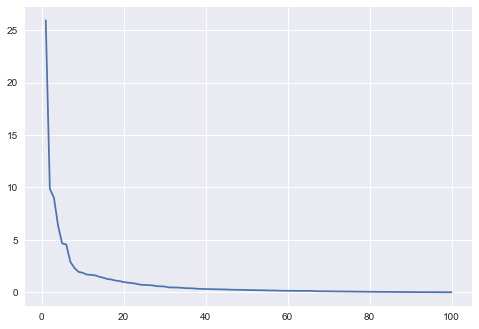

In [44]:
plt.plot(pca1_table['PCA #'], pca1_table['Variance Explained'])

plt.show()

In [49]:
pca1.components_

array([[ -8.61721369e-03,  -1.23181410e-01,  -1.02582390e-01, ...,
         -8.44094956e-02,  -8.32377538e-02,  -9.17600839e-02],
       [  5.48758561e-03,   7.13033253e-02,   1.14886377e-01, ...,
         -1.27560407e-01,  -1.21625957e-01,  -4.25738074e-02],
       [  2.29319802e-03,  -1.23055516e-02,   2.32922926e-02, ...,
         -1.02961163e-02,  -1.21491854e-02,  -1.57505241e-02],
       ..., 
       [  1.86021228e-05,  -4.90184880e-06,  -3.09621590e-04, ...,
          8.30753146e-05,  -1.36658681e-04,   1.42326305e-04],
       [  9.73794770e-17,  -1.10737582e-17,   6.41576105e-17, ...,
          5.09077806e-17,   1.98869767e-17,   2.61547695e-17],
       [  0.00000000e+00,   3.87371220e-16,   3.24100742e-16, ...,
          8.56504039e-17,  -6.74865453e-17,   5.66831768e-17]])

# Exploratory Data Analysis
## Charts Describing Demographic Features of the Donors

In [241]:
# Find number of missing values
print ('Number of missing records for AGE: {:0.0f}'.format(donate_all.AGE.isnull().sum()))
print ('Number of missing records for GENDER: {:0.0f}'.format(donate_all.GENDER.isnull().sum()))
print ('Number of missing records for DOMAIN: {:0.0f}'.format(donate_all.DOMAIN.isnull().sum()))
print ('Number of missing records for INCOME: {:0.0f}'.format(donate_all.INCOME.isnull().sum()))

Number of missing records for AGE: 23665
Number of missing records for GENDER: 0
Number of missing records for DOMAIN: 0
Number of missing records for INCOME: 21286


In [254]:
# Clean GENDER column
donate_all.GENDER = np.where((donate_all.GENDER == 'F') | (donate_all.GENDER == 'M'),   donate_all.GENDER, 'Others')
donate_all.GENDER.value_counts()

F         51277
M         39094
Others     5041
Name: GENDER, dtype: int64

In [255]:
# Create Socio-Economic Status column
donate_all['SES'] = donate_all.DOMAIN.str[1]
donate_all['SES'].value_counts()

2    46040
1    28498
3    16754
4     1804
Name: SES, dtype: int64

In [248]:
#donate_all.SES.isnull().sum()

2316

In [251]:
# Recode values of Socio-Econ status
def ses_recode(ses):
    
    if ses == 1:
        return 'High'
    elif ses == 2:
        return 'Average'
    elif (ses == 3) or (ses == 4):
        return 'Low'
    else: 
        return np.NaN
    
# Find Socio-econ status
donate_all['SES'] = donate_all['SES'].notnull().apply(ses_recode)
donate_all['SES'].value_counts()

Series([], Name: SES, dtype: int64)

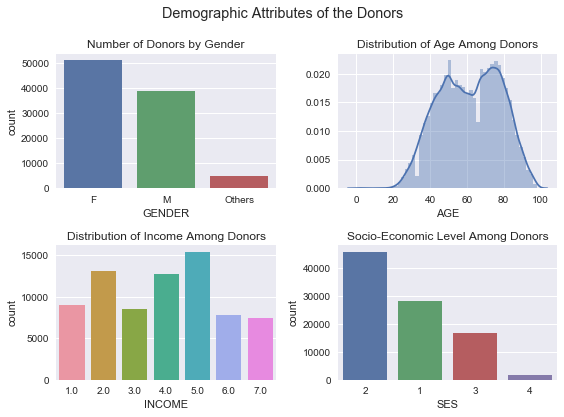

In [258]:
# Create plots
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

sns.countplot(data = donate_all, x = 'GENDER', ax = ax1)
ax1.set_title('Number of Donors by Gender')

sns.distplot(donate_all['AGE'].dropna(), ax = ax2)
ax2.set_title('Distribution of Age Among Donors')

sns.countplot(data = donate_all, x = 'INCOME', ax = ax3)
ax3.set_title('Distribution of Income Among Donors')

sns.countplot(data = donate_all, x = donate_all['SES'], ax = ax4)
ax4.set_title('Socio-Economic Level Among Donors')


plt.suptitle('Demographic Attributes of the Donors', y = 1.05)
f.tight_layout()
plt.show()

From the above charts we can see:
    - About 60% of donors are female. 40% are male.
    - Donors's age ranges from <20 to >100, with highest number of donors around 50 and 80 years old.
    - Household income ranges from 1 to 7, with about 20% of donors have income of 2, 4, and 5.
    - About half of the donors have average socio-economic status (SES = 2)

In [266]:
donate_all[['RAMNTALL', 'NGIFTALL', 'AVGGIFT', 'TARGET_B', 'TARGET_D', 'AGE', 'INCOME']].describe()

,RAMNTALL,NGIFTALL,AVGGIFT,TARGET_B,TARGET_D,AGE,INCOME
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,71747.000000,74126.000000
mean,104.489351,9.602031,13.347786,0.050759,0.793073,61.611649,3.886248
std,118.580367,8.554342,10.769997,0.219506,4.429725,16.664199,1.854960
min,13.000000,1.000000,1.285714,0.000000,0.000000,1.000000,1.000000
25%,40.000000,3.000000,8.384615,0.000000,0.000000,48.000000,2.000000
50%,78.000000,7.000000,11.636364,0.000000,0.000000,62.000000,4.000000
75%,131.000000,13.000000,15.477955,0.000000,0.000000,75.000000,5.000000
max,9485.000000,237.000000,1000.000000,1.000000,200.000000,98.000000,7.000000


Only 5% of donors responded to the 97NK promotion.

Number of lifetime gifts to date range from 1 to 237, with the mean of 10.

Total amount of gifts to date ranges from \$13 to \$9458, with a mean of $104

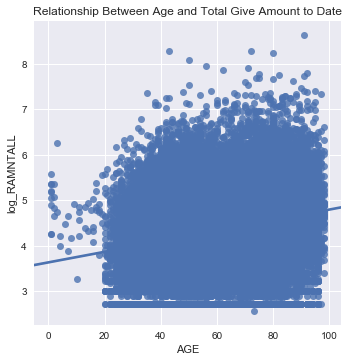

In [341]:
# Correlate total giving with age, income, etc...

donate_all['log_AGE'] = np.log(donate_all.AGE)
donate_all['log_RAMNTALL'] = np.log(donate_all.RAMNTALL)
sns.lmplot('AGE', 'log_RAMNTALL', data = donate_all, fit_reg = True, ci = 95)
plt.title('Relationship Between Age and Total Give Amount to Date')
plt.show()

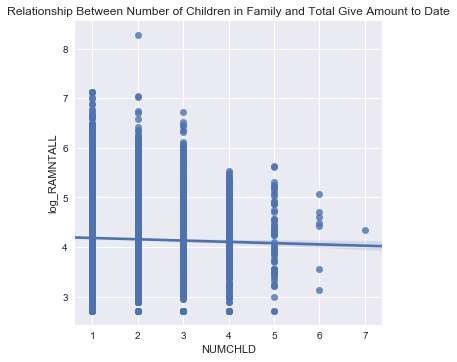

In [312]:

sns.lmplot('NUMCHLD', 'log_RAMNTALL', data = donate_all, fit_reg = True, ci = 95)
plt.title('Relationship Between Number of Children in Family and Total Give Amount to Date')
plt.show()

In [314]:
donate_all.loc[:,'RAMNT_3':'RAMNT_24'].describe()

,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,...,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24
count,242.000000,281.000000,9.000000,776.00000,8895.000000,21472.000000,16734.000000,10461.000000,14740.000000,25700.000000,...,7262.000000,26994.000000,9401.000000,19778.000000,15877.000000,7888.000000,9513.000000,20873.000000,7859.000000,17738.000000
mean,12.221074,14.540107,17.000000,14.35692,15.088435,15.673702,15.101013,15.415070,14.562430,14.859901,...,13.347521,14.032142,12.754589,12.283269,13.116019,14.262132,12.942051,12.266252,12.149945,11.364891
std,9.153015,14.548098,14.908052,10.06335,11.032013,12.153908,13.020388,12.356341,10.703185,10.848680,...,11.043516,10.948453,10.979879,11.787762,12.847063,10.161455,10.692959,9.179317,9.342705,8.708032
min,2.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,0.300000,1.000000,1.000000,...,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,0.290000,0.300000,1.000000
25%,6.000000,7.000000,8.000000,9.00000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,...,7.000000,8.000000,6.000000,6.000000,8.000000,9.000000,7.000000,7.000000,6.000000,5.000000
50%,10.000000,10.000000,12.000000,12.00000,15.000000,15.000000,14.000000,14.000000,12.000000,13.000000,...,10.000000,12.000000,10.000000,10.000000,10.000000,12.000000,10.000000,10.000000,10.000000,10.000000
75%,15.000000,15.000000,20.000000,19.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,16.000000,17.000000,15.000000,15.000000,15.000000,18.000000,15.000000,15.000000,15.000000,15.000000
max,50.000000,100.000000,50.000000,100.00000,250.000000,500.000000,1000.000000,500.000000,300.000000,300.000000,...,300.000000,500.000000,500.000000,1000.000000,970.000000,250.000000,300.000000,300.000000,200.000000,225.000000


In [348]:
# Calculate the share of donors who responded to each promotion in the dataset, as well as the total give amount.
prom_code = ['96NK', '96TK', '96SK', '96LL', '96G1', '96GK', '96CC', '96WL', '96X1', '96XK',  '95FS', '95NK', '95TK',
            '95LL', '95G1','95GK', '95CC', '95WL', '95X1', '95XK', '94FS', '94NK']

col_list = list(donate_all.loc[:,'RAMNT_3':'RAMNT_24'])

percent_give = []
total_give = []
for col in col_list:
    percent = donate_all[col].notnull().sum()*100/len(donate_all[col])
    percent_give.append(percent)
    give = donate_all[col].sum()
    total_give.append(give)   
    
df1 = pd.DataFrame({'Percent of Donors Who Gave': percent_give, 'Total Give Amount': total_give}, index = prom_code)
df1

,Percent of Donors Who Gave,Total Give Amount
96NK,0.253637,2957.50
96TK,0.294512,4085.77
96SK,0.009433,153.00
96LL,0.813315,11140.97
96G1,9.322727,134211.63
96GK,22.504507,336545.72
96CC,17.538674,252700.35
96WL,10.964030,161257.05
96X1,15.448791,214650.22
96XK,26.935815,381899.45


Percent of donors who responded to 96NK, 96TK, 96SK, and 96LL are very low compared to those who responded to previous promotions.

In [350]:
# Percent population who is certain nationality/urban and rural areas
donate_all.loc[:,'POP90C1':'ETH16'].describe()

,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,...,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,58.589653,13.622479,26.140527,48.211724,50.951390,84.854505,7.467405,0.776904,2.905704,7.458077,...,0.397350,0.612806,0.561491,0.250587,0.210309,0.068388,5.138169,0.302478,0.327433,1.513615
std,47.430774,31.222078,40.037855,5.565579,5.768361,21.013875,16.690771,3.469319,7.069759,13.786061,...,2.232166,2.533743,2.309205,1.003530,1.054121,1.169671,11.333534,1.292820,3.208650,3.365285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,47.000000,50.000000,82.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,0.000000,0.000000,49.000000,51.000000,93.000000,1.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,99.000000,0.000000,52.000000,50.000000,53.000000,98.000000,6.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,72.000000,99.000000,67.000000,46.000000,47.000000,72.000000,97.000000,57.000000,81.000000,86.000000


In [359]:
# Perform PCA on the above variables

from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit(donate_all.loc[:,'POP90C1':'ETH16'])

pca_num = np.arange(1, len(pca1.explained_variance_ratio_) + 1)
pca1_table = pd.DataFrame({'Variance Explained': pca1.explained_variance_ratio_*100, 'PCA #': pca_num})
pca1_table

,PCA #,Variance Explained
0,1,58.365429
1,2,21.766790
2,3,10.520489
3,4,5.100161
4,5,1.886147
5,6,0.998641
6,7,0.416394
7,8,0.336341
8,9,0.244369
9,10,0.098653


In [358]:
# Check that the total variance in above table sums to 1
pca1_table['Variance Explained'].sum()

1.0000000000000002

In [386]:
# Subset features, exclude target variables
y = donate_all.loc[:,'TARGET_B':'TARGET_D']
X = donate_all.drop(['TARGET_B', 'TARGET_D', 'log_age', 'log_RAMNTALL', 'log_AGE', 'SES'], axis = 1)
X.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,95515,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,148535,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,15078,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,172556,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,7112,1,L,2,F,X,X,X,26.0,A


In [387]:
# Subset numeric columns in order to perform variance-based feature selection
numeric_cols = [col for col in X.columns if X[col].dtype in [np.int64, np.float64]]
X_numeric = X[numeric_cols]
X_numeric.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0


In [394]:
X_numeric_nonan = X_numeric.fillna(0)

In [389]:
# Correlate
X_numeric_cor = X_numeric.corr()

In [390]:
X_numeric_cor

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
ODATEDW,1.000000,-0.033214,0.099450,-0.309158,0.034955,0.092271,0.062001,-0.070752,-0.018143,-0.038262,...,0.083575,0.026900,0.976866,0.967057,-0.087904,0.216869,0.079036,-0.073435,-0.065082,-0.060178
TCODE,-0.033214,1.000000,-0.003527,0.011079,0.003457,-0.005683,-0.006437,-0.002897,-0.001160,-0.006312,...,-0.000010,0.001691,-0.033189,-0.028885,0.004964,-0.005778,-0.001920,-0.002025,0.007835,0.001131
DOB,0.099450,-0.003527,1.000000,-0.999753,0.136305,0.237440,0.121114,0.023451,0.015087,-0.012335,...,0.020664,-0.040782,0.098443,0.117962,0.020849,0.020828,-0.023648,0.076916,-0.048517,-0.089878
AGE,-0.309158,0.011079,-0.999753,1.000000,-0.191526,-0.250397,-0.112801,0.124108,0.007102,0.025609,...,-0.045776,0.053216,-0.307190,-0.307045,-0.009806,-0.089998,-0.029013,0.096668,0.058292,0.057309
NUMCHLD,0.034955,0.003457,0.136305,-0.191526,1.000000,0.022066,0.025711,0.003927,0.028935,-0.007479,...,-0.002989,0.013250,0.033765,0.050338,-0.011415,-0.018747,0.004462,0.024972,0.019857,-0.020415
INCOME,0.092271,-0.005683,0.237440,-0.250397,0.022066,1.000000,0.456094,0.004738,-0.007168,-0.035434,...,0.091475,-0.019800,0.091900,0.095260,0.025956,0.114931,0.066211,-0.029094,-0.079972,-0.375648
WEALTH1,0.062001,-0.006437,0.121114,-0.112801,0.025711,0.456094,1.000000,0.020244,-0.003759,-0.024914,...,0.067108,-0.007454,0.061093,0.060993,0.017545,0.086482,-0.027074,-0.017367,-0.052808,-0.669403
HIT,-0.070752,-0.002897,0.023451,0.124108,0.003927,0.004738,0.020244,1.000000,0.273154,0.190401,...,-0.007213,0.019177,-0.070811,-0.063271,0.008685,-0.014705,0.000420,0.213498,-0.000448,-0.053954
MBCRAFT,-0.018143,-0.001160,0.015087,0.007102,0.028935,-0.007168,-0.003759,0.273154,1.000000,0.213852,...,-0.011943,0.000070,-0.017894,-0.013148,0.001517,-0.016241,-0.001785,0.018020,0.014721,0.018549
MBGARDEN,-0.038262,-0.006312,-0.012335,0.025609,-0.007479,-0.035434,-0.024914,0.190401,0.213852,1.000000,...,-0.018356,0.010707,-0.035594,-0.035359,0.002419,-0.027719,-0.017925,0.013237,0.005762,0.061729


In [404]:
# Feature selection using Variance-based
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)  #which threshold to set?
reduced_X = sel.fit_transform(X_numeric_nonan)

In [405]:
reduced_X.shape

(95412, 397)

In [402]:
X_numeric_nonan.shape

(95412, 405)

In [406]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [298]:
cols = list(donate_all.loc[:,'RAMNT_3': 'RAMNT_24']) + ['CONTROLN']
df_give = donate_all[cols]

In [299]:
df_give.head()

,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,...,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,CONTROLN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,95515
1,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148535
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,9.0,NaN,8.0,NaN,NaN,NaN,8.0,7.0,6.0,15078
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,...,7.0,11.0,NaN,NaN,6.0,11.0,NaN,NaN,NaN,172556
4,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7112


In [ ]:
cols = list(df.loc[:,'A':'C']) + ['E'] + list(df.loc[:,'G':'I'])

df[cols]

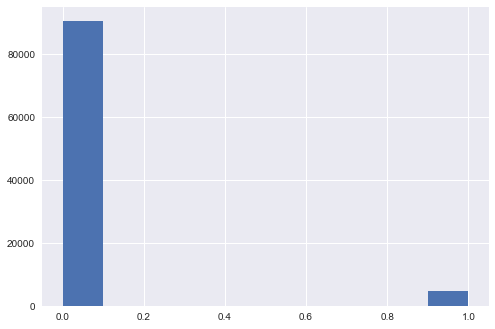

In [88]:
plt.hist(donate_all.TARGET_B)
plt.show()

In [56]:
donate_all['Recency of Giving'] = donate_all.MDMAUD[0]
donate_all['Recency of Giving'].value_counts()

XXXX    95412
Name: Recency of Giving, dtype: int64

In [57]:
donate_all.MDMAUD.value_counts()  #Most people are not major donors, indicated by the share of XXXX

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5MM        5
D5CM        5
D2MM        4
I1LM        3
C2LM        3
D5TM        3
C5CM        3
C2MM        3
C5TM        1
C1MM        1
L2TM        1
L2LM        1
C5MM        1
L1MM        1
I5CM        1
I2MM        1
I5MM        1
Name: MDMAUD, dtype: int64

In [128]:
donate_all.INCOME.value_counts()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

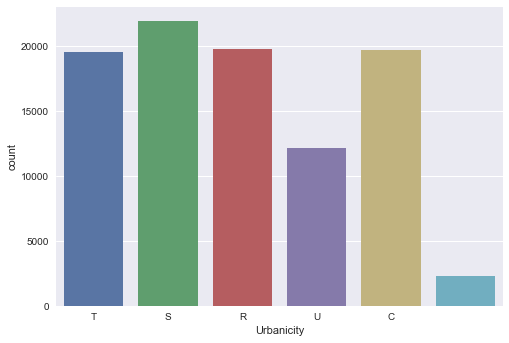

In [65]:
donate_all['Urbanicity'] = donate_all.DOMAIN.str[0]
donate_all['Urbanicity'].value_counts()
sns.countplot(data = donate_all, x = 'Urbanicity')
plt.show()

In [159]:
donate_all['Socioecon'] = donate_all.DOMAIN.str[1]
donate_all['Socioecon'].value_counts()


2    46040
1    28498
3    16754
4     1804
Name: Socioecon, dtype: int64

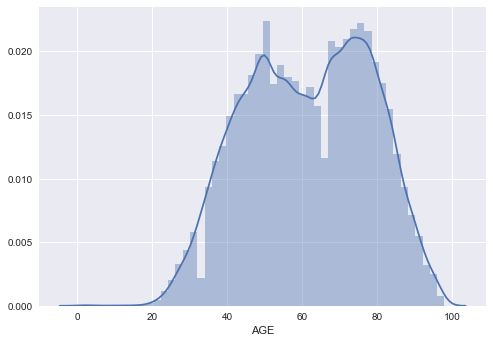

In [72]:
sns.distplot(donate_all['AGE'].dropna())
plt.show()

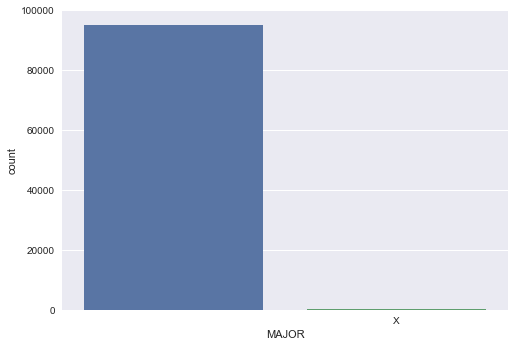

In [74]:
sns.countplot(x = 'MAJOR', data = donate_all)
plt.show()

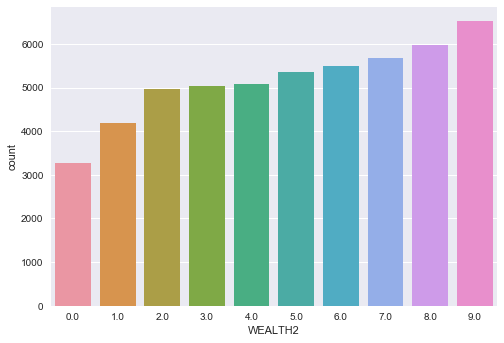

In [75]:
sns.countplot(x = 'WEALTH2', data = donate_all)
plt.show()

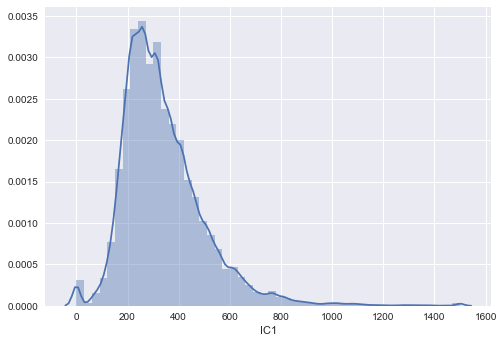

In [76]:
sns.distplot(donate_all['IC1'].dropna())
plt.show()

In [91]:
donate_all.RAMNT_3.value_counts()

10.0    37
5.0     31
7.0     21
20.0    20
15.0    18
3.0     15
25.0    13
8.0     12
9.0      9
12.0     9
14.0     8
6.0      8
4.0      6
50.0     6
2.0      5
11.0     4
16.0     3
13.0     2
23.0     2
30.0     2
17.0     2
21.0     2
18.0     1
3.5      1
40.0     1
29.0     1
22.0     1
19.0     1
35.0     1
Name: RAMNT_3, dtype: int64

In [84]:
len(donate_all.RFA_2)

95412

In [89]:
donate_all.RAMNTALL.describe()

count    95412.000000
mean       104.489351
std        118.580367
min         13.000000
25%         40.000000
50%         78.000000
75%        131.000000
max       9485.000000
Name: RAMNTALL, dtype: float64

In [93]:
donate_all.ADATE_2.value_counts()

9706    95399
9704       13
Name: ADATE_2, dtype: int64

In [94]:
donate_all.ADATE_3.value_counts()

9606.0    93444
9604.0       18
Name: ADATE_3, dtype: int64

In [99]:
donate_all.ADATE_8.value_counts()

9601.0    85468
9512.0     6360
9511.0       51
9603.0       18
9605.0        4
Name: ADATE_8, dtype: int64

In [17]:
donate.columns.tolist()

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGE',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ET

In [14]:
donate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB
